In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [2]:
image_path = "../output_videos/cropped_image.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

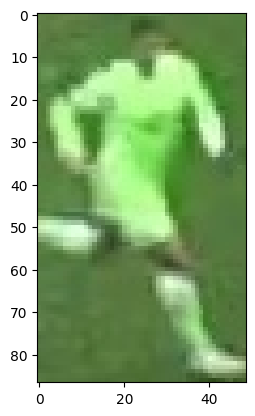

In [3]:
plt.imshow(image)
plt.show()

Take top half of image for jersey

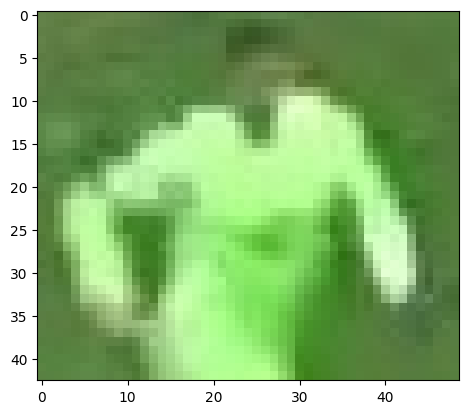

In [4]:
top_half_image = image[0: int(image.shape[0]//2), :]
plt.imshow(top_half_image)
plt.show()

Cluster image into 2 clusters

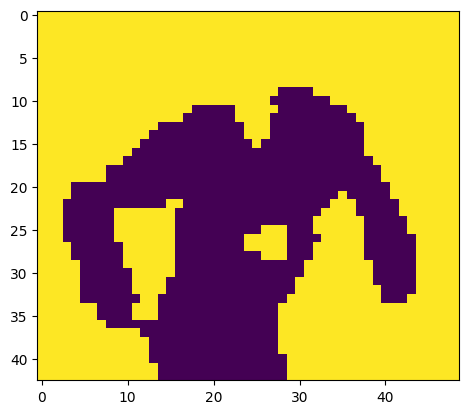

In [9]:
# reshape image into 2d array
image_2d = top_half_image.reshape(-1,3)

# perform k means clustering into 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0).fit(image_2d)

# get the cluster labels
labels = kmeans.labels_

# reshape labels into original image shape
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

# display clustered image image
plt.imshow(clustered_image)
plt.show()

In [10]:
# assigning non player by majority voting of corner pixels
corner_clusters= [clustered_image[0,0], clustered_image[0,-1], clustered_image[-1,0], clustered_image[-1,-1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)

1


In [11]:
player_cluster = 1 - non_player_cluster
print(player_cluster)

0


In [13]:
# color of actual player jersey
kmeans.cluster_centers_[player_cluster]

array([170.96714849, 235.24835742, 142.40341656])